## Problem statement.

Build a recommender system by using cosine simillarties score.



In [9]:
#Step 1: Import Libraries 
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances


In [10]:
#Step 2: Load and Explore Data
# Load the dataset from a CSV file located in Google Drive
book_data = pd.read_csv('book.csv', encoding='unicode_escape')

# Display the first few rows of the dataset to understand its structure
book_data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [11]:
#Step 3: Data Cleaning and Preparation
# Remove unnecessary columns and rename others for clarity
book_data_cleaned = book_data.drop(['Unnamed: 0'], axis=1)
book_data_cleaned = book_data_cleaned.rename(columns={'User.ID': 'UserID', 'Book.Title': 'Title', 'Book.Rating': 'Rating'})

# Display the cleaned data
book_data_cleaned.head()

,UserID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


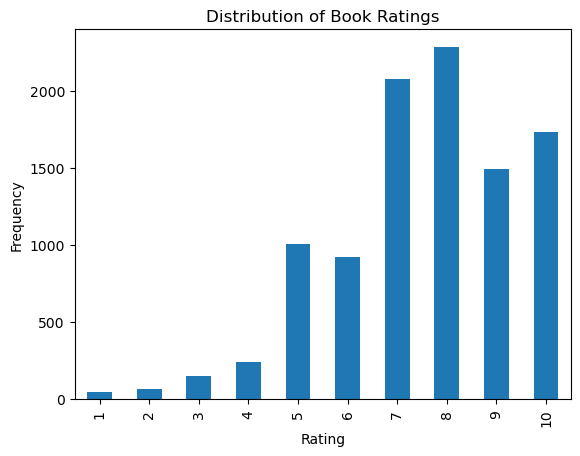

In [12]:
#Step 4: Analyze Ratings Distribution
# Analyze the distribution of book ratings
rating_counts = book_data_cleaned['Rating'].value_counts().sort_index()

# Plot the distribution of ratings
rating_counts.plot(kind='bar')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
#Step 5: Create User-Item Matrix
# Create a pivot table with users as rows, book titles as columns, and ratings as values
user_item_matrix = book_data_cleaned.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Display the user-item matrix
user_item_matrix.head()

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Step 6: Calculate User Similarity
# Calculate cosine similarity between users based on their ratings
user_similarity = 1 - pairwise_distances(user_item_matrix.values, metric='cosine')

# Set the diagonal to zero to ignore self-similarity
np.fill_diagonal(user_similarity, 0)

# Convert the similarity matrix to a DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Display a portion of the user similarity matrix
user_similarity_df.iloc[:5, :5]

UserID,8,9,10,12,14
UserID,,,,,
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


In [15]:
#Step 7: Define Recommendation Function
# Define a function to recommend books to a user based on similar users' preferences
def suggest_books(user_id):
  # Find the most similar user to the given user_id
  similar_user_id = user_similarity_df.loc[user_id].idxmax()
  
  # Get the books rated by the similar user
  similar_user_books = set(book_data_cleaned[book_data_cleaned['UserID'] == similar_user_id]['Title'])
  
  # Get the books already rated by the given user
  user_books = set(book_data_cleaned[book_data_cleaned['UserID'] == user_id]['Title'])
  
  # Recommend books that the similar user has rated but the given user has not
  return similar_user_books - user_books

# Test the recommendation function with a specific user ID
suggest_books(276813)

{'The Berlin Stories: The Last of Mr. Norris and  Goodbye to Berlin (New Directions Book)',
 'Young Wives'}

In [16]:
#Step 8: Test Recommendations
# Test the recommendation function with different user IDs
print("Recommendations for User 276813:", suggest_books(276813))
print("Recommendations for User 507:", suggest_books(507))
print("Recommendations for User 3462:", suggest_books(3462))

Recommendations for User 276813: {'Young Wives', 'The Berlin Stories: The Last of Mr. Norris and  Goodbye to Berlin (New Directions Book)'}
Recommendations for User 507: {'Brewing Up a Storm: A John Thatcher Mystery'}
Recommendations for User 3462: {'Ancient Celtic Romances', 'Keepers of the Earth Teachers Guide', 'Wings', 'The Art Of Celtia', 'The Celts Activity Book', 'Truckers', 'The Western way: A practical guide to the Western mystery tradition'}
